<a href="https://colab.research.google.com/github/zainabsaeed04072000-star/Deep-Learning_Practice/blob/main/Dog_Breed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"zainab0407","key":"644d30c34d366617134fe18bead9ffc5"}'}

In [ ]:

!mkdir -p ~/.kaggle
!mv "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!pip install kaggle

In [ ]:
!kaggle --version

Kaggle API 1.7.4.5


In [ ]:
!kaggle competitions download -c dog-breed-identification

 93% 645M/691M [00:04<00:01, 44.1MB/s]
100% 691M/691M [00:04<00:00, 173MB/s] 


In [ ]:
!unzip dog-breed-identification.zip -d dog_breed_data

Streaming output truncated to the last 5000 lines.
  inflating: dog_breed_data/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_breed_data/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_breed_data/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_breed_data/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_breed_data/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_breed_data/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_breed_data/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_breed_data/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_breed_data/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_breed_data/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_breed_data/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_breed_data/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_breed_data/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  


In [ ]:
#checking out labels of our data
import pandas as pd
labels_csv = pd.read_csv("dog_breed_data/labels.csv")
print(labels_csv.describe())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


Looking at this, we can clearly see that there are 10,222 rows i.e, 10,222 images.
And there are 120 unique dog breeds.
For if the most frequent value is fff43b07992508bc822f33d8ffd902ae and the most common breed is scottish_deerhound


<Axes: xlabel='breed'>

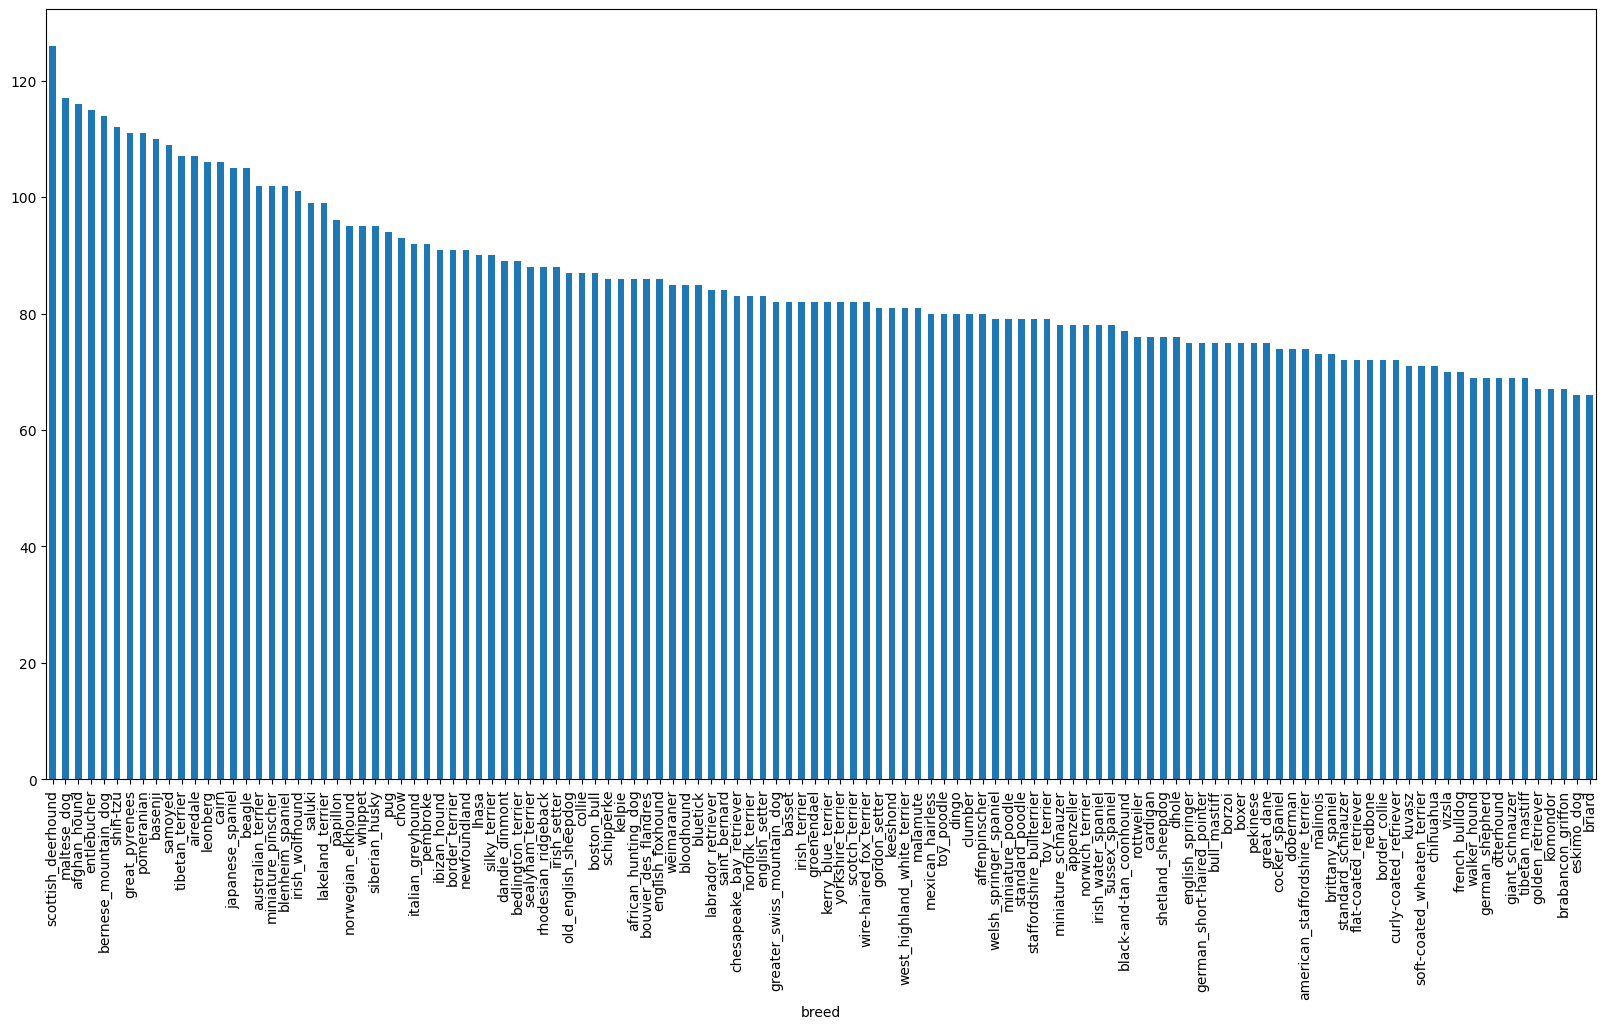

In [ ]:
#How many images are there for each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

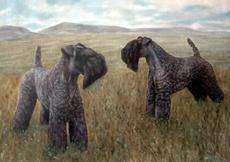

In [ ]:
from IPython.display import display, Image

display(Image(filename="dog_breed_data/train/fd229a951f5a9f2439d4f6c2c51595e3.jpg"))

# **Getting Images and their labels**

Since, we've got the image ID's an d their labels in a Dataframe (labels.csv), we'll use it to create:

* A list a filepaths to training images
* An array of all labels
* An array of all unique labels


We'll only create a list of filepaths to images rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.

In [ ]:
#create pathnames from image ID's

filenames = ["dog_breed_data/train/" + fname + ".jpg" for fname in labels_csv["id"]]

#checking the first 10 names
filenames[:10]

['dog_breed_data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog_breed_data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog_breed_data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog_breed_data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog_breed_data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog_breed_data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog_breed_data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog_breed_data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog_breed_data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog_breed_data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

Now we've got a list of all the filenames from ID column of labels_csv, we can compare it to the number of files in our training data directory to see if they line up.

If they do, great. If not, there may be isssue when unzipping the data(what we did above), to fix this, you might have to unzip the data again. Be careful not to let your colab notebook disconnect whilst unzipping.

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("dog_breed_data/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


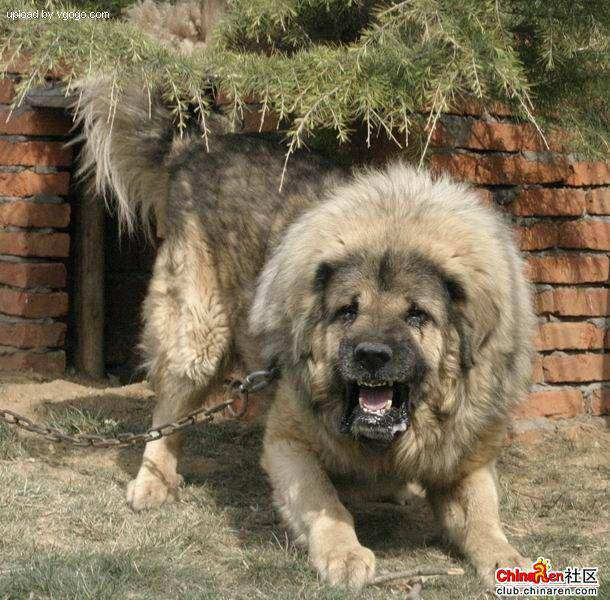

In [ ]:
#check an image directly from a filepath

Image(filenames[9000])

Now we've got our image filepaths together, let's get the labels. We'll take them from labels_csv and turn them into a NumPy array.

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [ ]:
#See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Number of labels does not match number of filenames, check data dirtectories")

Number of labels matches number of filenames


In [ ]:
#finding unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

The length of unique breeds should be 120, meaning we are working with the images of 120 different breeds of dogs.

Now use unique_breeds to help turn our labels array into an array of booleans

In [ ]:
labels


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
filenames

['dog_breed_data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog_breed_data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog_breed_data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog_breed_data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog_breed_data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog_breed_data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog_breed_data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog_breed_data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog_breed_data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog_breed_data/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'dog_breed_data/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'dog_breed_data/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'dog_breed_data/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'dog_breed_data/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 'dog_breed_data/train/0075dc49dab4024d12fafe67074d8a81.jpg',
 'dog_breed_data/train/00792e341f3c6eb33663e415d0715370.jpg',
 'dog_br

In [ ]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_breeds # use comparison operator to create boolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:

# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

Why do it like this?

Remember, an important concept in machine learning is converting your data to numbers before passing it to a machine learning model.

In this case, we've transformed a single dog breed name such as boston_bull into a one-hot array.

Let's see an example.

In [ ]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs


boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Now, we've got our labels in a numeric format and our image filepaths easily accessible (they aren't numeric yet), let's split our data up.

Creating our Own Validation Set

Since the dataset from Kaggle doesn't come with a validation set (a split of the data we can test our model on before making final predicitons on the test set), let's make one.

We could use Scikit-Learn's train_test_split function or we could simply make manual splits of the data.

For accessibility later, let's save our filenames variable to X (data) and our labels to y.

---



In [ ]:
#Setup X and y variables
X = filenames
y = boolean_labels

Since we're working with 10,000+ images, it's a good idea to work with a portion of them to make sure things are working before training on them all.

This is because computing with 10,000+ images could take a fairly long time. And our goal when working through machine learning projects is to reduce the time between experiments.

Let's start experimenting with 1000 and increase it as we need.

In [ ]:
#setting number of images to be used for experimenting
NUM_IMAGES = 1000
NUM_IMAGES

1000

Now let's split our data into training and validation sets. We'll use and 80/20 split (80% training data, 20% validation data).

In [ ]:
#Import train_test_split from Scikit-learn

from sklearn.model_selection import train_test_split

#split them into training and validation using NUM_IMAGES
X_train,y_train, X_val, y_val = train_test_split(X[:NUM_IMAGES],
                                                 y[:NUM_IMAGES],
                                                 test_size = 0.2,
                                                 random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 200, 800, 200)

In [ ]:
# Check out the training data (image file paths and labels)
X_train[:5], y_train[:2]

(['dog_breed_data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'dog_breed_data/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'dog_breed_data/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'dog_breed_data/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'dog_breed_data/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 ['dog_breed_data/train/0ca9280205bd68d201e1d708db3f209d.jpg',
  'dog_breed_data/train/12405b2e93417d81f5308769c4e184c7.jpg'])

# **Processing images (turning images into Tensors)**


Our labels are in numeric format but our images are still just file paths.

Since we're using TensorFlow, our data has to be in the form of Tensors.

A Tensor is a way to represent information in numbers. If you're familar with NumPy arrays (you should be), a Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.

Because of how TensorFlow stores information (in Tensors), it allows machine learning and deep learning models to be run on GPUs (generally faster at numerical computing).

To preprocess our images into Tensors we're going to write a function which does a few things:

Takes an image filename as input.
Uses TensorFlow to read the file and save it to a variable, image.
Turn our image (a jpeg file) into Tensors.
Resize the image to be of shape (224, 224).
Return the modified image.


You might be wondering why (224, 224), which is (heigh, width). It's because this is the size of input our model (we'll see this soon) takes, an image which is (224, 224, 3).

What? Where's the 3 from? We're getting ahead of ourselves but that's the number of colour channels per pixel, red, green and blue.

Let's make this a little more concrete.

In [ ]:
#convert image to Numpy array

from matplotlib.pyplot import imread
image = imread(filenames[42]) #load 43rd image, read in an image
image.shape

(257, 350, 3)

(257, 350, 3)
Notice the shape of image. It's (257, 350, 3). This is height, width, colour channel value.

And you can easily convert it to a Tensor using tf.constant().

In [ ]:
import tensorflow as tf

tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
#define image size

IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and convert it into tensor.
  """

  #Read in image file
  image = tf.io.read_file(image_path)
  #Turn the jpeg image into numerical Tensor with 3 colour channels(Red,Green,Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  #Convert the colour channel values from 0-255 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image to our desired size (244,244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image


# **Creating Data Batches**

Now we've got a function to convert our images into Tensors, we'll now build one to turn our data into batches (more specifically, a TensorFlow BatchDataset).

What's a batch?

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of process_image function at the same time.

In [ ]:
#Create a simple function to return a tuple(image,label)

def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image,label)
  """

  image = process_image(image_path)
  return image, label

Now we've got a simple function to turn our image file path names and their associated labels into tuples (we can turn these into Tensors next), we'll create a function to make data batches.

Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.

We'll set a default batch size of 32 because according to Yann Lecun (one of the OG's of deep learning), friends don't let friends train with batch sizes over 32.

In [52]:
#Define the batch_size, 32 is a good default
BATCH_SIZE = 32

#Create a function to turn data into batches
def create_data_batches(x,y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data
  Also accepts test data as input (no labels).
  """

  #If the data is a test dataset, we probably don't have labels

  if test_data:
    print("Creating test data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) #only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  #If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), #filepaths
                                               tf.constant(y))) #labels

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    #if the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    #Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), #filepaths
                                               tf.constant(y))) #labels

    #shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    #Create (image,label) tuples (this also turns the image_path into a preprocessed image), get_image_label to pair image tensors with labels
    data = data.map(get_image_label)

    #Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


